tgb - 1/8/2020 - Figures 1 and 2 for my birthday to prepare our MPI project for submission. Heavily based on Julia's notebooks:    
Figure 1 = [https://github.com/tbeucler/2019_WMI/blob/master/dev/jwindmiller/Bistability_Fig1.ipynb]  
Figure 1 long-time average for ERA = [https://github.com/tbeucler/2019_WMI/blob/master/dev/jwindmiller/Seasonal_cycle.ipynb]  
Figure 1 PDF for COSMO = [https://github.com/tbeucler/2019_WMI/blob/master/dev/tbeucler/014_Unified_Figures_1_and_2.ipynb]
Figure 2 = [https://github.com/tbeucler/2019_WMI/blob/master/dev/jwindmiller/Potential_LFE_Fig2.ipynb]

# 0) Initialization

## 0.1) Imports

In [1]:
# Initial imports
import util.Landau_Potential_Diffusion as Landau
import util.curvature as curve
import util.pdf as PDF

import xarray as xr
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import datetime
from skimage import measure
from scipy import ndimage, stats
import scipy.integrate as sin
from scipy.optimize import curve_fit
from scipy.ndimage.filters import gaussian_filter1d
import random
import pandas as pd

import pickle

In [2]:
# Figure characteristics common to all Figures
fz = 15
lw = 3
siz = 10

plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['lines.markersize'] = siz
plt.close('all')

# Physical constants
stday = 24*3600

## 0.2) Utilities

In [3]:
class Bunch(object):
  
    def __init__(self, adict):
        self.__dict__.update(adict)

In [4]:
def edgTObin(edges):
    return 0.5*(edges[1:]+edges[:-1])

In [5]:
def get_all_values(dic_values):
    values = []
    for i_k, key in enumerate(dic_values.keys()):
        values.extend(dic_values[key])
    return values

# 1) Figure 1

## 1.1) COSMO simulations (Fig 1a and 1c)

### 1.1.1) Figure 1a = Final (aggregated) state of column water vapor

#### Make Figure

In [6]:
path_RCE = '/project/s916/davidle/RCE-MIP/simulations/RCE_300_3km_506x506/output/'

In [ ]:
RCE300 = xr.open_mfdataset(path_RCE+'lfff????????.nc')

In [ ]:
RCE300

In [ ]:
SPINstart = 0 #days
COALstart = 11 #days
COARstart = 25 #days
ENDstart = 85 # days

In [ ]:
CWV_agg = RCE300.TQV[(24*ENDstart):].mean(dim='time')

In [ ]:
CWV_agg

In [ ]:
toplot = CWV_agg.values

In [ ]:
dx = 3.3
x = dx*CWV_agg.rlon
y = dx*CWV_agg.rlat

In [ ]:
fig,ax = plt.subplots(figsize=(7.5,7.5))


ax.contour(x,y, toplot,[48.00],colors='k')
cont_levels = np.linspace(20,75,25)
im = ax.contourf(x, y, toplot, cont_levels, vmin = 20, vmax = 75, extend='both')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('(a) Time-mean CWV (day 85-100) in RCE')
cbar = plt.colorbar(im)

#### Save reduced data

#### Make Figure from reduced data

### 1.1.2) Figure 1c = PDF of column water vapor

In [ ]:
# Load reduced data into dictionary S
pathPKL = '/users/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
path = pathPKL+'2019_11_19_Fig1a.pkl'
hf = open(path,'rb')
S = pickle.load(hf)

In [ ]:
F1c = Bunch(S)

In [ ]:
fig,ax = plt.subplots(figsize=(7.5,7.5))

# Figure 1a
ax2 = ax.twinx()

# Shading goes in the back
ax2.fill_between(edgTObin(F1c.SPINedges),F1c.SPIN_min,F1c.SPIN_max,color=1-(1-F1c.SPINrgb)/2)
ax.fill_between(edgTObin(F1c.COALedges),F1c.COAL_min,F1c.COAL_max,color=1-(1-F1c.COALrgb)/2)
ax.fill_between(edgTObin(F1c.COARedges),F1c.COAR_min,F1c.COAR_max,color=1-(1-F1c.COARrgb)/2)

# Right axis = Day 11-100
SPINline = ax2.plot(edgTObin(F1c.SPINedges),F1c.CWV_PDF_SPIN,color=F1c.SPINrgb,label='Day0 - Day11')
# Add dots to indicate mean value of percentile chosen for MMLi
ax2.scatter(x=F1c.SPIN_P48_mean,y=np.interp(x=F1c.SPIN_P48_mean,xp=edgTObin(F1c.SPINedges),fp=F1c.CWV_PDF_SPIN),color=F1c.SPINrgb)

ax2.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$',color=F1c.SPINrgb)
ax2.spines['right'].set_color(F1c.SPINrgb)
ax2.tick_params(axis='y', colors=F1c.SPINrgb)
ax2.set_ylim((0,ax2.get_ylim()[1]))
leg2 = ax2.legend(frameon=False,bbox_to_anchor=(0,0,0.95,1))

# Left axis = Day0-Day11
COALline = ax.plot(edgTObin(F1c.COALedges),F1c.CWV_PDF_COAL,color=F1c.COALrgb,label='Day11 - Day25')
COARline = ax.plot(edgTObin(F1c.COARedges),F1c.CWV_PDF_COAR,color=F1c.COARrgb,label='Day85 - Day100')
# Add dots to indicate mean value of percentile chosen for MMLi
ax.scatter(x=F1c.COAL_P48_mean,y=np.interp(x=F1c.COAL_P48_mean,xp=edgTObin(F1c.COALedges),fp=F1c.CWV_PDF_COAL),color=F1c.COALrgb)
ax.scatter(x=F1c.COAR_P48_mean,y=np.interp(x=F1c.COAR_P48_mean,xp=edgTObin(F1c.COARedges),fp=F1c.CWV_PDF_COAR),color=F1c.COARrgb)

leg = ax.legend(frameon=False,bbox_to_anchor=(0,0,1,0.95))
ax.set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$')
ax.set_ylim((0,ax.get_ylim()[1]))
ax.set_title('(c) PDF of CWV in RCE')

plt.draw()

# Save figure
path_home = '/users/tbeucler/'
plt.savefig(path_home+'Fig1.pdf',format='pdf')

## 1.2) ERA5 Reanalysis

### 1.2.1) Figure 1b = Time-mean column water vapor field

#### Make Figure

In [ ]:
path_ERA = '/project/s916/ERA5_Tom/'

In [ ]:
latmin = -23
latmax = 23
lonmin = 360-34
lonmax = 360-18

In [ ]:
date1, date2 = np.datetime64('2000-01-01T00:00'), np.datetime64('2017-12-31T23:00')

In [ ]:
thresh = 83 #48mm in percentile

In [ ]:
PW = xr.open_mfdataset(path+'????/??PW.nc',combine='by_coords')
PWAtl = PW['tcwv'].sel({'time':slice(date1, date2), 'longitude':slice(lonmin,lonmax),'latitude':slice(latmax,latmin)})
lonAtl = PW.longitude.sel({'longitude':slice(lonmin,lonmax)})
latAtl = PW.latitude.sel({'latitude':slice(latmax,latmin)})

In [22]:
PWAtl_mean = PWAtl.mean('time').values

In [ ]:
time_A = PWAtl.time.values

In [ ]:
LSM = xr.open_mfdataset(path+'ERA_LANDSEAMASK.nc')
LSMAtl = LSM['lsm'].sel({'longitude':slice(lonmin,lonmax),'latitude':slice(latmax,latmin)})

In [ ]:
# Calculate Area of domain assuming a rectangle (since we assumed constant dx for the contour)
dx = 110/4 #km
A_domain = PWAtl.shape[1]*PWAtl.shape[2]*(dx**2) #km**2
L_band = 2.0*PWAtl.shape[2]*dx
circle_sw = False

In [ ]:
year = 2009
YEAR = np.arange(2000,2018)# np.append(np.arange(2000,2014), np.arange(2015,2018)) #2014 is missing!

AxesSubplot(0.125,0.125;0.775x0.755)


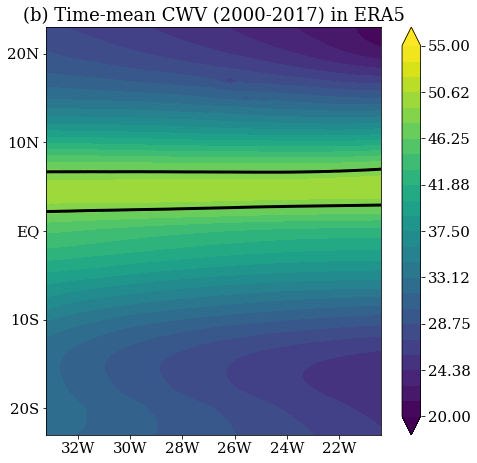

In [48]:
# Multi-year mean of CWV 
fig, axes = plt.subplots(1,1,figsize=(7.5,7.5))

print(axes)

tmp = PWAtl_mean

axes.contour(lonAtl, latAtl, tmp, [48.00], colors=['k'])#, vmin = 2.7e9, vmax=2.85e9)
cont_levels = np.linspace(20,55,25)
im = axes.contourf(lonAtl, latAtl, tmp, cont_levels, vmin = 20, vmax = 55, extend='both')
# for c in im.collections:
#     c.set_edgecolor("face")
# axes.set_aspect('equal')

locs = axes.get_xticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    labels[i_l] = '%iW'%int(360-loc)
axes.set_xticklabels(labels) 

locs = axes.get_yticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    if loc >0:
        labels[i_l] = '%iN'%int(loc)
    elif loc == 0:
        labels[i_l] = 'EQ'
    else:
        labels[i_l] = '%iS'%int(loc*-1)
axes.set_yticklabels(labels)
axes.set_title('(b) Time-mean CWV (2000-2017) in ERA5')

cbar = plt.colorbar(im)

#### Save reduced data

#### Make Figure from reduced data

### 1.2.2) Figure 1d = PDF of column water vapor for ERA

#### Make Figure

In [50]:
nbins = 30
xbins = np.linspace(10, 70, 31)

In [52]:
path_JuliaPKL = '/users/tbeucler/2019_WMI/dev/jwindmiller/PKL_DATA/'
dic_hist = np.load(path_JuliaPKL+'CWV_hist_%i_%i_%i_%i_%i.npz'%(nbins, latmin, latmax, lonmin, lonmax))

hist_total = dic_hist['hist_total']
bin_edges = dic_hist['bin_edges']

In [54]:
hist_cum = np.cumsum(hist_total)/np.sum(hist_total)

In [55]:
hist_total = hist_total/np.sum(hist_total)/(bin_edges[1]-bin_edges[0])

In [56]:
with open(path_JuliaPKL+'pik_times.dat', 'rb') as f:
    times_A = pickle.load(f)
times_A

[numpy.datetime64('2005-11-23T14:00:00.000000000'),
 numpy.datetime64('2005-12-04T14:00:00.000000000'),
 numpy.datetime64('2005-12-07T14:00:00.000000000')]

Modify times_A so that times_A[1] coincides with the minimum in contour length

In [ ]:
plt.plot()

Plot Figure

In [ ]:
plt.close('all')

fig,ax = plt.subplots(figsize=(7.5,7.5))

x = np.linspace(10,75,161)



for i, time in enumerate(times_A):

    tmp = np.squeeze(PWAtl.sel({'time':slice(time-np.timedelta64(12,'h'), time+np.timedelta64(12,'h'))}).values) #np.squeeze(PWAtl.sel({'time':time}).values) #
    #tmp = np.squeeze(PWAtl.sel({'time':time}).values) 
    
    print(time, np.percentile(tmp, per_thresh_era5))
    
    if switch_kde:
        density = stats.gaussian_kde(np.ndarray.flatten(tmp))
        plt.plot(x, density(x), label = pd.to_datetime(time).strftime("%d-%b"), color = col_A[i])
    else:
        hist, edges = np.histogram(np.ndarray.flatten(tmp), density = True, bins = xbins)
        plt.plot(edgTObin(edges), hist, label = pd.to_datetime(time).strftime("%d-%b"), color = col_A[i])
        print(np.sum(hist*(edges[1:]-edges[:-1])))
    
    plt.legend(frameon=False)
    #plt.vlines([np.percentile(tmp, per_thresh_era5)], 0.0, ymax, linestyle=':', color = 'C%i'%i)
    
#plt.plot(bin_centers, hist_total, 'k')
plt.fill_between(bin_centers,hist_total, color = 'k',label='85d-100d', alpha = 0.1)
    
ymin, ymax = plt.ylim()
plt.vlines([48], 0.0, ymax, linestyle=':')
plt.ylim(0.0, 0.062)
plt.yticks([0.0, 0.02, 0.04, 0.06])
plt.xlim(xbins[0]-5, xbins[-1]+5)

ax.set_xlabel(r'$\mathrm{CWV}$ $\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_ylabel(r'$\mathrm{%s\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$'%method)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('b)', loc = 'left')
    
plt.tight_layout()

#plt.savefig('./Figures/Fig1b.pdf', bbox_inches = "tight")

#### Save Reduced Data

#### Make Figure from reduced data

## 1.3) Combine all subplots into single Figure

# 2) Figure 2

## 2.1) COSMO simulations

## 2.2) ERA5 Reanalysis

### Make Figure

In [ ]:
CONJUL_data = {}

path_PKL = '/users/tbeucler/2019_WMI/dev/jwindmiller/PKL_DATA/'

for i,year in enumerate(range(2000,2018)):
    print('i=',i,' & year=',year,' ',end='\r')
    hf = open(path_PKL+'CONTOURL_PW_%i_%i_%i_%i_%i_'%(latmin, latmax, lonmin, lonmax, thresh)+str(year)+'.pkl','rb') # open('../jwindmiller/PKL_DATA/10_17_CONTOURL'+str(year)+'.pkl','rb')
    tmp = pickle.load(hf)
    CONJUL_data[year] = tmp['Tot_Contour_km'][str(year)]
    
cont_t = np.array(get_all_values(CONJUL_data))

In [ ]:
with open(path_PKL+'pik_times.dat', 'rb') as f:
    times_A = pickle.load(f)
times_A

Find minimal contour between times_A[0] and times_A[2]

In [ ]:
date1, date2 = np.datetime64('2005-01-01T00:00'), np.datetime64('2005-12-31T23:00')

In [ ]:
PW2005 = PW['tcwv'].sel({'time':slice(date1, date2), 'longitude':slice(lonmin,lonmax),'latitude':slice(latmax,latmin)})

In [72]:
PW2005.time

<xarray.DataArray 'time' (time: 8760)>
array(['2005-01-01T00:00:00.000000000', '2005-01-01T01:00:00.000000000',
       '2005-01-01T02:00:00.000000000', ..., '2005-12-31T21:00:00.000000000',
       '2005-12-31T22:00:00.000000000', '2005-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2005-01-01 ... 2005-12-31T23:00:00
Attributes:
    long_name:  time

In [65]:
CONJUL_data[2005].shape

(8760,)

In [67]:
8760/24

365.0

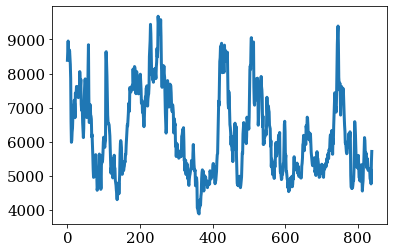

In [69]:
plt.plot(PWCONJUL_data[2005][-24*35:])

Modify times_A[1] accordingly

Calculate PW tendency, Potential, LFE

In [ ]:
times_Vstart = times_A[0] 
times_Vend   = times_A[1] 

ileftV = find_index(time_A, np.datetime64(times_Vstart))
irightV = find_index(time_A, np.datetime64(times_Vend))

In [ ]:
PWAtl_res = PWAtl[ileftV-1:irightV+2,:,:].values # If can't fit in the memory, can't calculate potential

In [ ]:
dPW_dt = (PWAtl_res[2:,:,:]-PWAtl_res[:-2,:,:])/(2*dt)

In [ ]:
tmp,binm_Vfinal,Vfinal = Landau.Landau_energy(PWAtl_res[1:-1,:,:],dPW_dt,N_bins=50)

In [ ]:
date_startF = times_A[0] 
date_endF   = times_A[-1]

ileftF = find_index(time_A, np.datetime64(date_startF))
irightF = find_index(time_A, np.datetime64(date_endF))
PWAtl_F = PWAtl[ileftF:irightF,:,:]
Ffinal,binm_Ffinal,tmp = Landau.Landau_energy(PWAtl_F.values,N_bins=30,V_fixed=Vfinal,bin_fixed=binm_Vfinal)

In [ ]:
dbin_Vfinal = (binm_Vfinal[1:]-binm_Vfinal[:-1])[0]
binc_Vfinal = binm_Vfinal-0.5*dbin_Vfinal
binc_Vfinal = np.append(binc_Vfinal, binc_Vfinal[-1]+dbin_Vfinal)

In [ ]:
dic_hist = {}
times_labels = pd.to_datetime(times_A).strftime("%d-%b")
times_year   = int(pd.to_datetime(times_A[0]).strftime("%Y"))

for i, time in enumerate(times_A):
    tmp = np.squeeze(PWAtl.sel({'time':slice(time-np.timedelta64(6,'h'), time+np.timedelta64(6,'h'))}).values)
    hist, edges = np.histogram(np.ndarray.flatten(tmp), density = True, bins = binc_Vfinal)
    
    dic_hist[times_labels[i]]=hist
    
dic_hist.keys()

In [ ]:
option = 'Agg' # Aggregating, potential averaged from imin_left to imax
option = 'Dis' # Disaggregating, potential averaged from imax to imin_right

plt.close('all')
fig,ax = plt.subplots(2,1,figsize=(cm_to_inch(9), cm_to_inch(20)))
plt.subplots_adjust(hspace=0.33)


ax[0].set_title('b)',pad=20, loc = 'left')
ax[0].set_xlabel(r'CWV [kg m$^{-2}$]')
ax[0].set_ylabel(r'Potential [J$^{2}$ m$^{-4}$ s$^{-1}$]')
#ax[0].yaxis.tick_right()
#ax[0].yaxis.set_label_position("right")

ax[0].set_xlim(10,70)

for i, time_lab in enumerate(times_labels):
    ax[0].fill_between(binm_Vfinal, Vfinal, Vfinal+dic_hist[time_lab]*5e-3,color=col_A[i],label=time_lab, alpha = 0.25)
    ax[0].plot(binm_Vfinal, Vfinal+dic_hist[time_lab]*5e-3,color=col_A[i])
    
ax[0].plot(binm_Vfinal, Vfinal,color='k')
    
nam = 'Fig2b.pdf'

ax[0].legend(frameon=False)

time_period = time_A[np.where((time_A>times_A[0]-np.timedelta64(6,'h'))&(time_A<times_A[-1]+np.timedelta64(6,'h')))]
cont_period = cont_t[np.where((time_A>times_A[0]-np.timedelta64(6,'h'))&(time_A<times_A[-1]+np.timedelta64(6,'h')))]

axbis = ax[1].twinx()
axbis.plot(time_period, cont_period,color='C3')
axbis.plot(time_period, gaussian_filter1d(cont_period, sigma=12), 'C3:')
axbis.spines['right'].set_color('C3')
axbis.tick_params(axis='y', colors='C3')

axbis.set_ylabel('Contour Length [km]',color='C3')

ax[0].spines['top'].set_visible(False)
axbis.spines['top'].set_visible(False)

ax[0].spines['right'].set_visible(False)
axbis.spines['right'].set_visible(False)

ax[1].plot(PWAtl_F.time, Ffinal,color='k')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=70 )


# plt.ylim(100, 300)
# ax1 = plt.gca()
# ax2 = plt.twinx(ax1)
# ax2.plot(time_period, cont_period, 'C1')
# ax2.plot(time_period, gaussian_filter1d(cont_period, sigma=12), 'C1:')
# #plt.xlim(date_startF[i_d], date_endF[i_d])
# plt.ylim(1000, 10000)
# plt.ylabel('Contour length', color = 'C1')

ymin_F, ymax_F = 1.0e-4, 3.0e-4 #ax[1].get_ylim()
ymin_C, ymax_C = 1e3, 1e4 # ax[0].get_ylim()

axbis.set_ylim(ymin_C, ymax_C)

# From https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax[1].transData, ax[1].transAxes)

for i, time in enumerate(times_A):

    print(time-np.timedelta64(12,'h'), time+np.timedelta64(12,'h'))
    ax[1].fill_between(x=time_period,y1=period_y_min,y2=period_y_max,where=(time_period<=(time+np.timedelta64(6,'h')))&(time_period>=(time-np.timedelta64(6,'h'))),
                       facecolor=col_A[i],alpha=0.5,transform=trans, clip_on = False)
    
    print(len(np.where(((time_period>=(time-np.timedelta64(6,'h')))&(time_period<=(time+np.timedelta64(6,'h')))))[0]))

ax[1].set_xlim((time_period.min(),time_period.max()))
ax[1].set_ylim((ymin_F, ymax_F))
ax[1].set_title('d)',loc='left', pad = 20)
ax[1].set_ylabel(r'Free Energy [kg$^{2}$ m$^{-4}$ s$^{-1}$]')

ax[0].ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
ax[1].ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
axbis.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')

plt.subplots_adjust(hspace = 0.4)

ax[1].spines['top'].set_visible(False)
axbis.spines['top'].set_visible(False)

### Save reduced data

### Make Figure from reduced data